# Classification & Cross validation using Scikit-learn

### Step 1: Load and prepare the mushroom classification dataset

Problem: Given a set of *categorical* features about various mushroom species, predict whether the mushroom is **e**dible or **p**oisonous.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

mushrooms = pd.read_csv('mushrooms.csv', header=0)

In [2]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Separate the label and feature columns

In [4]:
labels = mushrooms['class']
features = mushrooms.drop(columns=['class'])

In [5]:
print(mushrooms.shape)
print(features.shape)
print(labels.shape)

(8124, 23)
(8124, 22)
(8124,)


In [6]:
labels.value_counts()

e    4208
p    3916
Name: class, dtype: int64

### Encode categorical variables

**Label encoding** to convert our class labels to numerical values  
**One-hot encoding** to convert our categorical features to numerical values

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

In [8]:
labels_enc = label_encoder.fit_transform(labels)
features_enc = onehot_encoder.fit_transform(features)

In [9]:
print(labels_enc.shape)
print(features_enc.shape)

(8124,)
(8124, 117)


In [10]:
labels_enc

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
features_enc

<8124x117 sparse matrix of type '<class 'numpy.float64'>'
	with 178728 stored elements in Compressed Sparse Row format>

### Classifier Models

Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

Decision Tree

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

Categorical Naive Bayes

In [14]:
from sklearn.naive_bayes import CategoricalNB

nb_clf = CategoricalNB()

Linear Support Vector Machine

In [15]:
from sklearn.svm import LinearSVC

svc = LinearSVC()

K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

### K-fold Cross Validation

To fairly evaluate the models, use k-fold cross validation when training and testing on the dataset

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

strat_kfold = StratifiedKFold(n_splits=5, shuffle=True)

In [18]:
log_reg_preds, tree_preds, nb_preds, svc_preds, knn_preds = [], [], [], [], []
all_labels = []
for train_idx, test_idx in strat_kfold.split(features, labels):
    train_feat, train_labels = features_enc[train_idx], labels_enc[train_idx]
    test_feat, test_labels = features_enc[test_idx], labels_enc[test_idx]
    
    log_reg.fit(train_feat, train_labels)
    tree_clf.fit(train_feat, train_labels)
    nb_clf.fit(train_feat.todense(), train_labels)
    svc.fit(train_feat, train_labels)
    knn_clf.fit(train_feat, train_labels)
    
    log_reg_preds.extend(log_reg.predict(test_feat))
    tree_preds.extend(tree_clf.predict(test_feat))
    nb_preds.extend(nb_clf.predict(test_feat.todense()))
    svc_preds.extend(svc.predict(test_feat))
    knn_preds.extend(knn_clf.predict(test_feat))
    
    all_labels.extend(test_labels)

In [21]:
print(classification_report(all_labels, log_reg_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4208
           1       1.00      1.00      1.00      3916

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124



In [20]:
print(classification_report(all_labels, tree_preds, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      4208
           p       1.00      1.00      1.00      3916

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124



In [22]:
print(classification_report(all_labels, nb_preds, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

           e       0.91      0.99      0.94      4208
           p       0.98      0.89      0.93      3916

    accuracy                           0.94      8124
   macro avg       0.94      0.94      0.94      8124
weighted avg       0.94      0.94      0.94      8124



In [23]:
print(classification_report(all_labels, svc_preds, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      4208
           p       1.00      1.00      1.00      3916

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124



In [24]:
print(classification_report(all_labels, knn_preds, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      4208
           p       1.00      1.00      1.00      3916

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124



In [25]:
label_encoder.classes_

array(['e', 'p'], dtype=object)

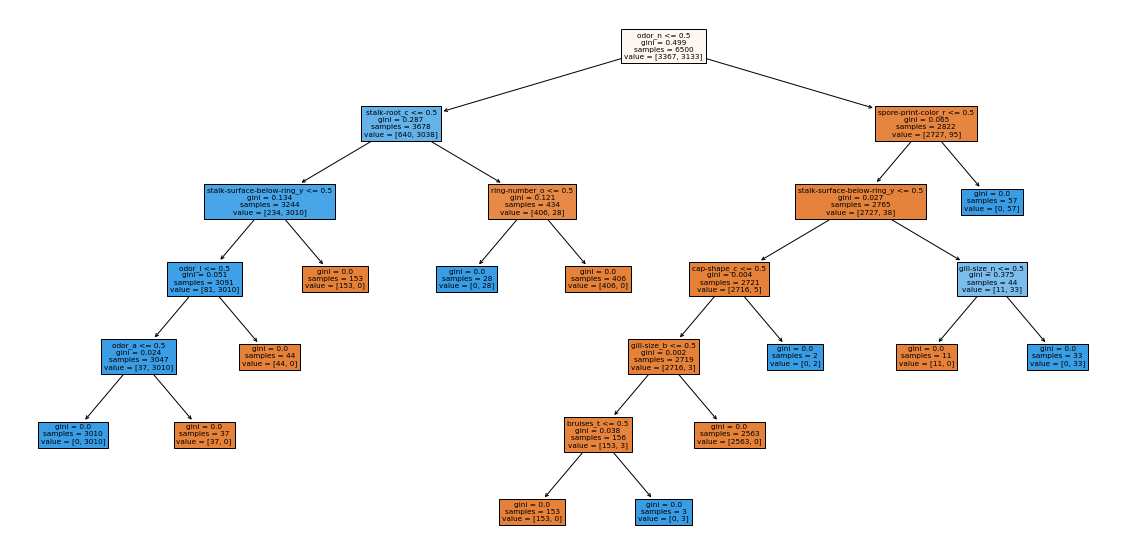

In [26]:
feature_names = onehot_encoder.get_feature_names(features.columns)

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_clf, feature_names=feature_names, filled=True)
plt.show()

***

In [27]:
drugs = pd.read_csv('drug200.csv', header=0)

In [28]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [29]:
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [30]:
labels = drugs['Drug']
features = drugs.drop(columns=['Drug'])

In [31]:
labels.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [32]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [33]:
labels

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

In [34]:
cat_cols = ['Sex', 'BP', 'Cholesterol']
num_cols = ['Age', 'Na_to_K']

In [35]:
drug_data = pd.get_dummies(drugs[cat_cols])

In [36]:
drug_data.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,1,0,1,0,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0
3,1,0,0,0,1,1,0
4,1,0,0,1,0,1,0


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
drug_data[num_cols] = scaler.fit_transform(drugs[num_cols])

In [39]:
drug_data.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age,Na_to_K
0,1,0,1,0,0,1,0,-1.291591,1.286522
1,0,1,0,1,0,1,0,0.162699,-0.415145
2,0,1,0,1,0,1,0,0.162699,-0.828558
3,1,0,0,0,1,1,0,-0.988614,-1.149963
4,1,0,0,1,0,1,0,1.011034,0.271794


In [40]:
from sklearn.model_selection import cross_val_predict

In [41]:
log_reg_preds = cross_val_predict(log_reg, drug_data, labels, cv=5)
tree_preds = cross_val_predict(tree_clf, drug_data, labels, cv=5)
# nb_preds = cross_val_predict(nb_clf, drug_data, labels, cv=5)
svc_preds = cross_val_predict(svc, drug_data, labels, cv=5)
knn_preds = cross_val_predict(knn_clf, drug_data, labels, cv=5)

In [42]:
print(classification_report(labels, log_reg_preds, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

       DrugY       0.96      0.96      0.96        91
       drugA       0.92      1.00      0.96        23
       drugB       0.93      0.81      0.87        16
       drugC       0.94      1.00      0.97        16
       drugX       0.98      0.96      0.97        54

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.96      0.95      0.95       200



In [43]:
print(classification_report(labels, tree_preds, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

       DrugY       0.99      1.00      0.99        91
       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



In [44]:
print(classification_report(labels, svc_preds, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

       DrugY       0.97      0.96      0.96        91
       drugA       0.96      1.00      0.98        23
       drugB       0.94      0.94      0.94        16
       drugC       0.94      1.00      0.97        16
       drugX       0.98      0.96      0.97        54

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.96       200



In [45]:
print(classification_report(labels, knn_preds, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

       DrugY       0.86      0.76      0.81        91
       drugA       0.74      0.87      0.80        23
       drugB       0.76      0.81      0.79        16
       drugC       0.64      0.56      0.60        16
       drugX       0.81      0.93      0.86        54

    accuracy                           0.81       200
   macro avg       0.76      0.79      0.77       200
weighted avg       0.81      0.81      0.80       200

